In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Python ile Makine Öğrenmesi/Ders 7 - Decision Tree (Karar Ağacı)'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Python ile Makine Öğrenmesi/Ders 7 - Decision Tree (Karar Ağacı)
'Decision Tree.ipynb'   maaslar.csv  'SVR.ipynb adlı dosyanın kopyası'


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
veriler = pd.read_csv("maaslar.csv")
veriler

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [ ]:
x = veriler.iloc[:,1:2]
y = veriler.iloc[:,2:]

X = x.values
Y = y.values

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,Y)

LinearRegression()

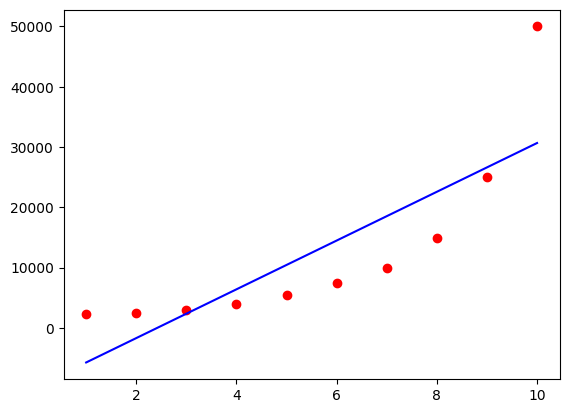

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y, color="red")
plt.plot(x,lr.predict(X), color="blue")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 3)

#verileri polinomal hale çeviriyoruz
x_poly = pf.fit_transform(X)
x_poly
#x^0, x^1,x^2
#X değeri 1-10 arası olsuğu için karesi de 1-100 arası

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

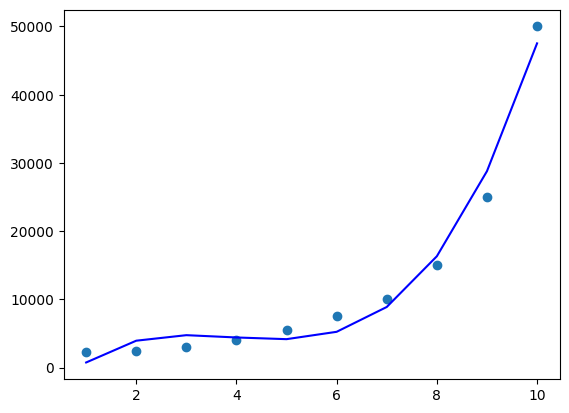

In [ ]:
lr2 = LinearRegression()
lr2.fit(x_poly, y)

plt.scatter(X,Y)
plt.plot(X,lr2.predict(pf.fit_transform(X)), color="blue")
plt.show()

In [ ]:
print(lr.predict([[11]]))
print(lr2.predict(pf.fit_transform([[11]])))

[[34716.66666667]]
[[73766.66666666]]


# SVR

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc1 = StandardScaler()
sc2 = StandardScaler()

x_olcekli = sc1.fit_transform(X)
y_olcekli = sc2.fit_transform(Y)

In [ ]:
from sklearn.svm import SVR

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


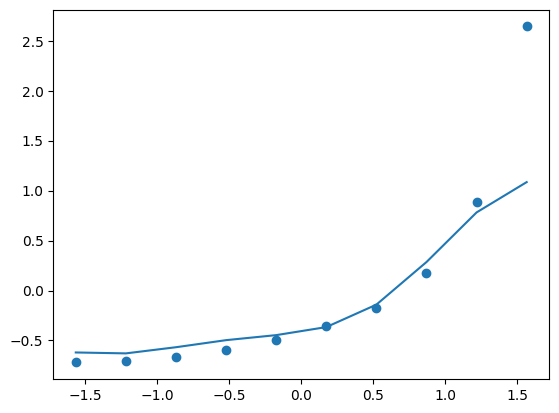

In [ ]:
svr = SVR(kernel = "rbf")
svr.fit(x_olcekli, y_olcekli)

plt.scatter(x_olcekli, y_olcekli)
plt.plot(x_olcekli, svr.predict(x_olcekli))

In [ ]:
print(svr.predict([[11]]))
print(svr.predict([[6.6]]))

[0.01150915]
[0.01150915]
